In [35]:
### IMPORT PACKAGES 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from  scipy import stats 
from  scipy.stats import norm
import math

from scipy.signal import argrelmin, argrelmax, argrelextrema
from sklearn import mixture

### Using GaussianMixture from sklearn

In [7]:
### We start defining a randon normal distribution
data = np.concatenate((np.random.normal(5, 5, 1000),np.random.normal(10, 2, 1000)))

/tmp/ipykernel_327625/847124028.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.ravel(data).astype(np.float) ## Return a contiguous flattened array, being all of them float numbers


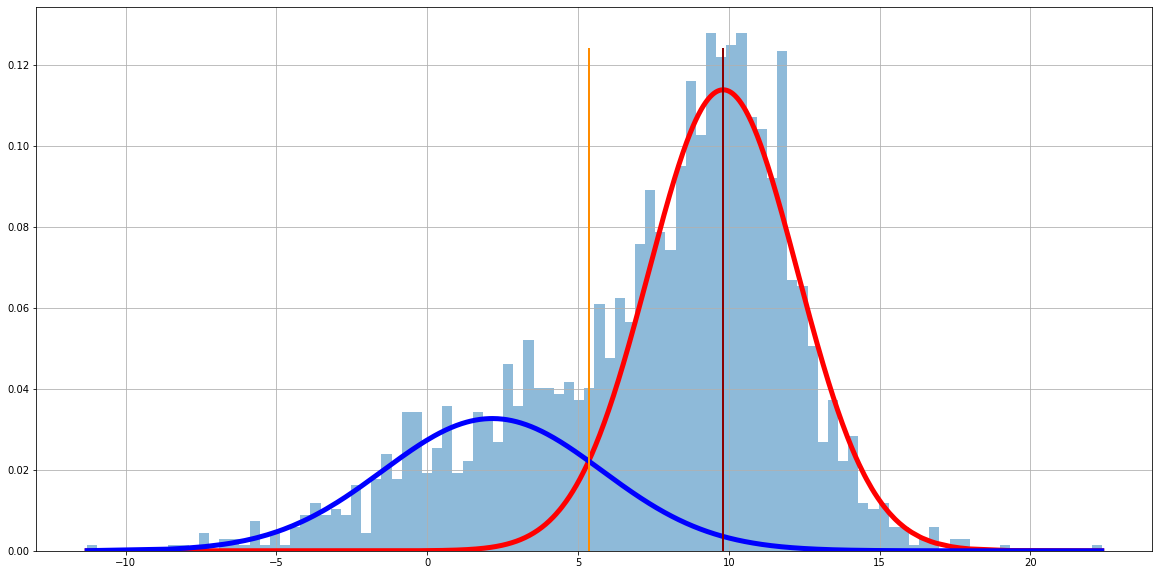

red curve [1.40054047e-17 9.09654046e-14 4.51333210e-13 ... 4.66910729e-04
 7.46025858e-05 2.62290771e-07]
The peak red curve 0.11382633037837522
blue curve [3.46529765e-05 4.11985805e-04 6.30890955e-04 ... 2.45137868e-06
 5.05327651e-07 6.11648637e-09]
The split 0.032655910316746084
weights [0.70287067 0.29712933]
means [9.81378739 2.16142866]
means [9.81378739 2.16142866]
covars [ 6.06855524 13.17607977]


In [34]:
### The function need a random state value (a int number from 0 to INF)
### If there are few data, maybe if you change the value the function will fit in a different way.
random_state = 0 ### Usually I use 0

plt.figure(figsize=(20,10))

f = np.ravel(data).astype(np.float) ## Return a contiguous flattened array, being all of them float numbers
f=f.reshape(-1,1)  ## Sort the data
g = mixture.GaussianMixture(n_components=2,covariance_type='full',random_state=random_state).fit(f) ## We fit a gaussian with 2 components 
weights, means, covars = g.weights_, g.means_, g.covariances_  ## Save the stadistics

plt.hist(f, bins=100, histtype='bar', density=True,alpha=0.5)  ## Histogram using the sorted and flattened data

f_axis = f.copy().ravel() ## We do a copy of the data 
f_axis.sort() ## We need to sort again since the valus should coincide with the histogram data
y1 = weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel() ## First component found by GaussianMixture
y2 = weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel() ## Second component found by GaussianMixture

## We plot both components
plt.plot(f_axis,y1, c='red',lw=5)
plt.plot(f_axis,y2, c='blue',lw=5)


### To find the peak
max_y = np.where(y1 == np.max(y1))[0][0]
spl = np.where(np.abs(y1 - y2)==np.sort(np.abs(y1 - y2))[3])
color_peak = f_axis[max_y] ## The peak of of the red gaussian
color_split = f_axis[spl]  ## The intersect point between two curves

## We plot both points
plt.plot(color_peak+np.zeros(10),np.linspace(0.0,np.max(y1)+0.01,10),'-',color='darkred',lw=2)
plt.plot(color_split+np.zeros(10),np.linspace(0.0,np.max(y1)+0.01,10),'-',color='darkorange',lw=2)


plt.grid()
plt.show()


print("red curve", y1)
print("The peak red curve", np.max(y1))
print("blue curve", y2)
print("The split", np.max(y2))

print('weights',weights)
print('means',means.flatten())
print('means',means.flatten())
print('covars',covars.flatten())
